In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000
1,2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000
2,2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000
3,2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000
4,2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       319 non-null    object 
 1   Open       319 non-null    float64
 2   High       319 non-null    float64
 3   Low        319 non-null    float64
 4   Close      319 non-null    float64
 5   Adj Close  319 non-null    float64
 6   Volume     319 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 17.6+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,319,319.000000,319.000000,319.000000,319.000000,319.000000,3.190000e+02
mean,2022-08-21 06:32:43.636363520,120.012972,122.008788,117.814800,119.913898,119.913898,7.401195e+07
min,2022-01-03 00:00:00,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,2022-04-27 12:00:00,98.325001,100.270001,96.915001,98.364998,98.364998,5.484990e+07
50%,2022-08-22 00:00:00,114.379997,116.910004,113.050003,114.800003,114.800003,6.560740e+07
75%,2022-12-13 12:00:00,141.893753,144.113998,139.139755,140.720001,140.720001,8.326670e+07
max,2023-04-11 00:00:00,170.438004,171.399994,167.868500,170.404495,170.404495,2.726620e+08
std,NaN,24.543964,24.748142,24.180140,24.421334,24.421334,3.201478e+07


## Explore Dataset

In [6]:
#Create month an quarter column
df['YearMonth'] = df['Date'].dt.strftime('%Y-%m')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       319 non-null    datetime64[ns]
 1   Open       319 non-null    float64       
 2   High       319 non-null    float64       
 3   Low        319 non-null    float64       
 4   Close      319 non-null    float64       
 5   Adj Close  319 non-null    float64       
 6   Volume     319 non-null    int64         
 7   YearMonth  319 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 20.1+ KB


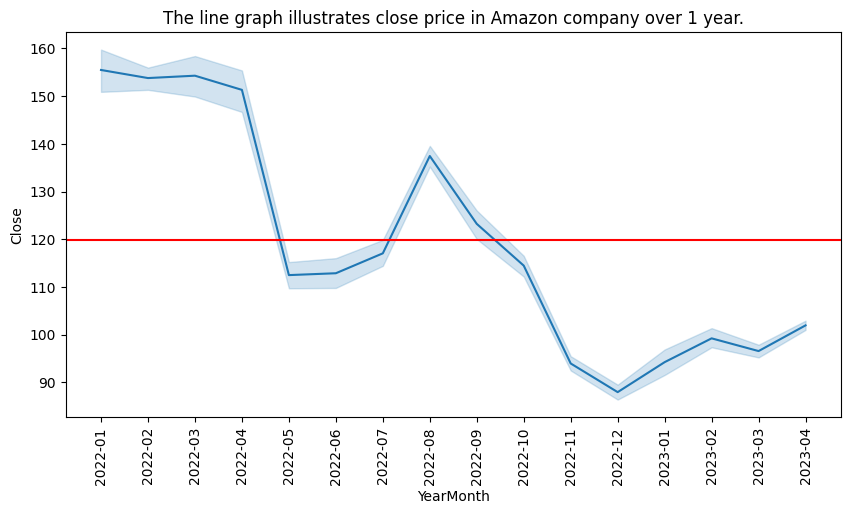

In [12]:
#Check variance of Close price from 1/2022 to 4/2023
plt.figure(figsize=(10,5))
sns.lineplot(x=df['YearMonth'], y = df['Close'])
plt.title('The line graph illustrates close price in Amazon company over 1 year.')
plt.axhline(y = df['Close'].mean(), color = 'r')
plt.xticks(rotation = 90)          
plt.show()

Insight: 

The line graph illustrates the change in close price in Amazon company during 1 years (1/2022 - 4/2023). Overral, the percentage of close price witnessed a downward trend to over 60 dollars and reached the lowest point of 90 dollars in November 2022. The 2023-year period was below price average in the rate of close price.

In [8]:
# cal close-1 cloumn
df['Close1'] = df['Close'].shift(-1)

# cal difference price per day 
df['PriceDiff'] = df['Close1'] - df['Close']

# cal return per day
df['Return'] = df['PriceDiff']/df['Close']

# cal direction depend on difference price
df['Direction'] = [1 if df.loc[ei, 'PriceDiff'] > 0
                   else -1
                   for ei in df.index]
    # pricediff > 0 --> positive
    # pricediff < 0 --> negative
    
# cal MA10 and MA50 -- moving average
df['MA10'] = df['Close'].rolling(10).mean() #MA10 is a fast signal
df['MA50'] = df['Close'].rolling(50).mean() #MA50 is a slow signal

# create share new depend on MA10 and MA50
df['Share_new'] = [1 if df.loc[ei, 'MA10'] > df.loc[ei,'MA50']
                   else 0
                   for ei in df.index]

# determine profit per day
df['Profit'] = [df.loc[ei,'Close1'] - df.loc[ei,'Close']
                if df.loc[ei,'Share_new'] == 1
                else 0
                for ei in df.index]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,YearMonth,Close1,PriceDiff,Return,Direction,MA10,MA50,Share_new,Profit
0,2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,2022-01,167.522003,-2.882492,-0.016916,-1,NaN,NaN,0,0.0
1,2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,2022-01,164.356995,-3.165008,-0.018893,-1,NaN,NaN,0,0.0
2,2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,2022-01,163.253998,-1.102997,-0.006711,-1,NaN,NaN,0,0.0
3,2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000,2022-01,162.554001,-0.699997,-0.004288,-1,NaN,NaN,0,0.0
4,2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000,2022-01,161.485992,-1.068009,-0.006570,-1,NaN,NaN,0,0.0


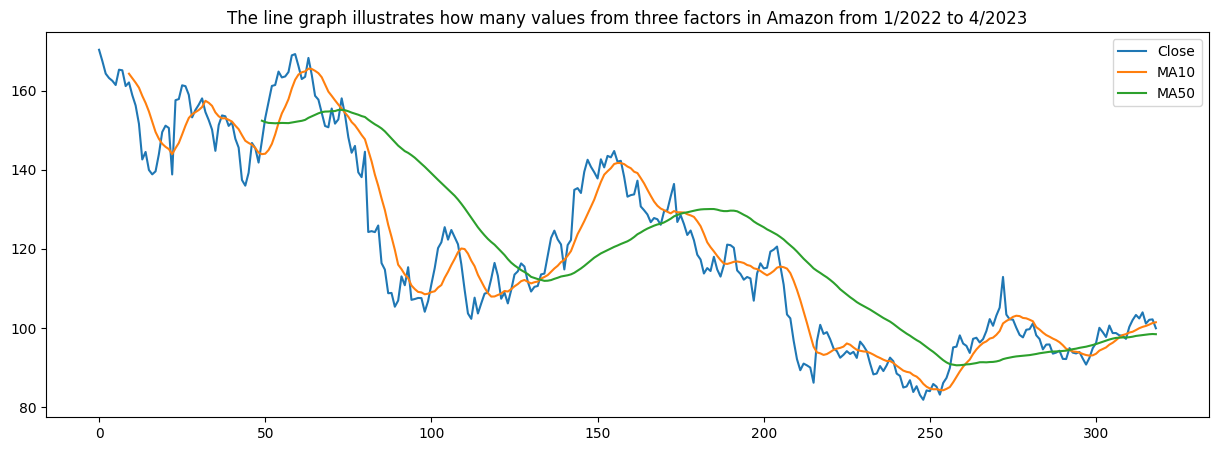

In [10]:
plt.figure(figsize=(15,5))
df['Close'].plot()
df['MA10'].plot()
df['MA50'].plot()
plt.legend()
plt.title('The line graph illustrates how many values from three factors in Amazon from 1/2022 to 4/2023')
plt.show()

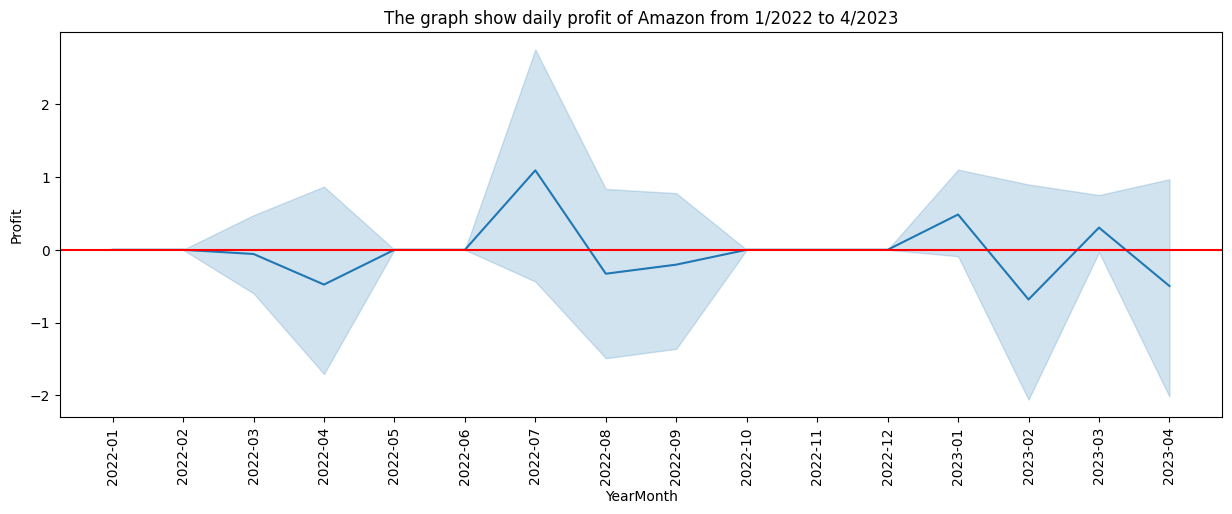

In [22]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['YearMonth'], y = df['Profit'])
plt.axhline(y = 0, color = 'r')
plt.title('The graph show daily profit of Amazon from 1/2022 to 4/2023')
plt.xticks(rotation = 90)
plt.show()

Insight:  
Up y = 0 --> Make money  
Above y = 0 --> Lose money

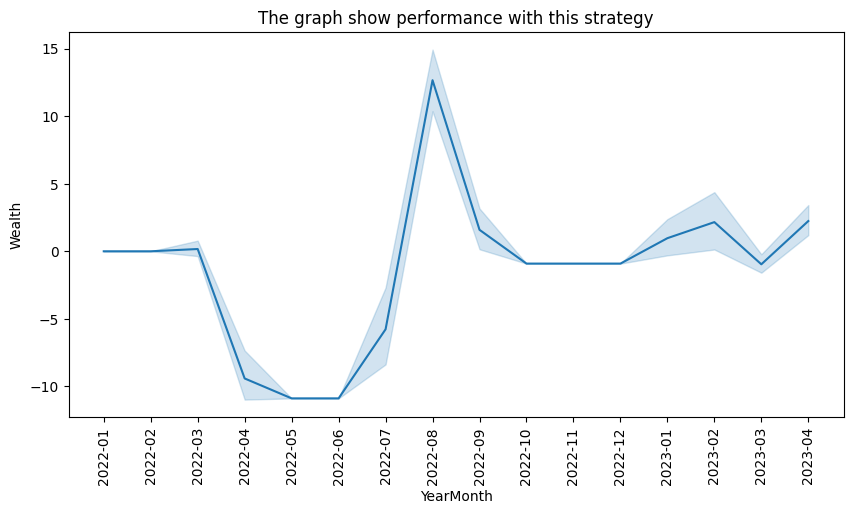

In [80]:
# Use cumsum() to display out model's performance if we follow the strategy
df['Wealth'] = df['Profit'].cumsum()

plt.figure(figsize=(10,5))
sns.lineplot(x = df['YearMonth'], y = df['Wealth'])
plt.title('The graph show performance with this strategy')
plt.xticks(rotation = 90)
plt.show()

# Distribution impact risk in stock

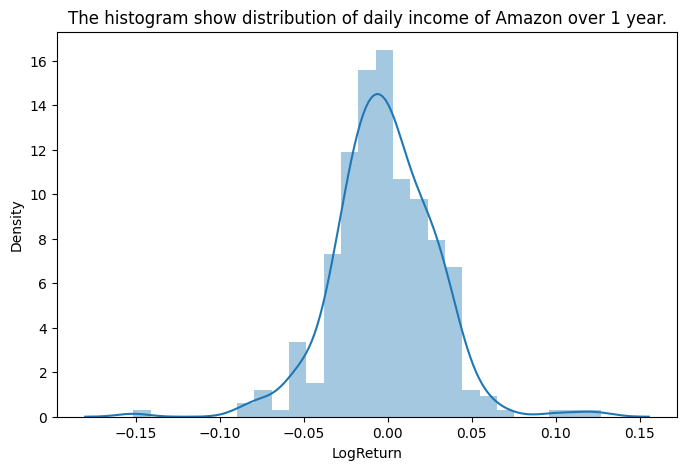

In [79]:
# Cal LogReturn per day
df['LogReturn'] = np.log(df['Close']).shift(-1) - np.log(df['Close'])

# Histogram display distribution of daily income of Amazon over 1 years
plt.figure(figsize=(8,5))
sns.distplot(df['LogReturn'])
plt.title('The histogram show distribution of daily income of Amazon over 1 year.')
plt.show()

In [28]:
from scipy.stats import norm 

# Cal approximate mean and variance of the log daily return
mu = df['LogReturn'].mean()
sigma = df['LogReturn'].std(ddof=1)
print('Average of Log Return per day in Amazon company:', round(mu,4), '\n')
print('Variance of Log Return per day in Amazon company:', round(sigma,4))

Average of Log Return per day in Amazon company: -0.0017 

Variance of Log Return per day in Amazon company: 0.0302


In [29]:
# Cal value at risk (VaR)
VaR = norm.ppf(0.05,mu,sigma)
print('Single day value at risk:', round(VaR,4))

# Quatile
# 5% quantile
print('5% quantile:', norm.ppf(0.05,mu,sigma))
# 95% quantile
print('95% quantile:', norm.ppf(0.95,mu,sigma))

Single day value at risk: -0.05132172013266999
5% quantile: -0.05132172013266999
95% quantile: 0.047964455054972086


# Confidence interval

In [31]:
# Left and right quantile
z_left = norm.ppf(0.1)
z_right = norm.ppf(0.9)

#Upper and Lower bound
interval_left = mu + z_left * sigma 
interval_right = mu + z_right * sigma 

print('Confidence interval for daily return')
print('Sample Mean is', round(mu,4))
print('******************************************')
print('90% confidence interval is')
# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".
print(round(interval_left,4),',',round(interval_right,4))

Confidence interval for daily return
Sample Mean is -0.0017
******************************************
90% confidence interval is
-0.0404 , 0.037


# Hypothesis testing - 1 factor

## Hypothesis for Two Tail Test  
 


In [34]:
# Cal sample size: n
n = df['LogReturn'].shape[0]
# Cal z value
zhat = (mu - 0)/(sigma/(n**0.5))
# Set confidence level
alpha = 0.05
    # We have 5% chance to reject null wrongly. This is called a type 1 error, and the probability
    # of a type 1 error is identical to the level of significance level.
    #If a siginificance level is small, the probability of a type 1 error is smaller.

# Hypothesis for Two Tail Test
    #Average of profit is equal to 0
    # Null hypothesis Ho: mu = 0
    # Alternative hypothesis H1: mu != 0
    
zleft = norm.ppf(alpha/2,0,1)
zright = norm.ppf(1-alpha/2,0,1)
    # z - distribution is symmetric

#Hypothesis for One Tail Test
    #Average of daily profit is positive
    #P-value
    # Ho: mu <= 0
    # Ha: mu > 0
# Cal p value
p_value = 1 - norm.cdf(np.abs(zhat),0,1) #abs is compute the absolute value

# Make desicion --> Shall we reject Ho?

print('Hypothesis for Two Tail Test (T-test)')
print('******************************************************')
print('Z value:', zhat)
print('z_left and z_right:', (zleft,zright),'\n')
print('At significant level of {}, shall we reject:{}'.format(alpha, zhat>zright or zhat<zleft),'\n')
if zhat>zright or zhat<zleft:
    print('Average of profit is not equal to 0')
else:
    print('Average of profit is equal to 0')

print('\n')
print('Hypothesis for One Tail Test')
print('******************************************************')
print('p-value = ', p_value,'\n')
print('At significant level of {}, shall we reject: {}'.format(alpha,p_value<alpha))

Hypothesis for Two Tail Test (T-test)
******************************************************
Z value: -0.9933892378224922
z_left and z_right: (-1.9599639845400545, 1.959963984540054) 

At significant level of 0.05, shall we reject:False 

Average of profit is equal to 0


Hypothesis for One Tail Test
******************************************************
p-value =  0.16026015213027378 

At significant level of 0.05, shall we reject: False


# Hypothesis for many factors

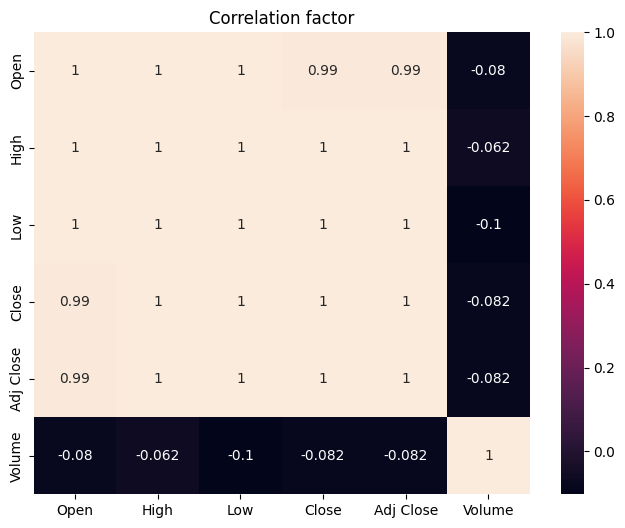

In [37]:
df1 = df[['Open','High','Low','Close','Adj Close','Volume']]
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot = True).set_title('Correlation factor')
plt.show()

# Predict price by Facebook Prophet

In [70]:
# Prepare data
data = df[['Date','Close']]
data = data.rename(columns={'Date':'ds','Close':'y'})
data.head()

,ds,y
0,2022-01-03,170.404495
1,2022-01-04,167.522003
2,2022-01-05,164.356995
3,2022-01-06,163.253998
4,2022-01-07,162.554001


In [71]:
from prophet import Prophet
# Prepare model
model = Prophet() #Linear regression model
model.fit(data)

14:13:08 - cmdstanpy - INFO - Chain [1] start processing
14:13:08 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
# Prediction with 365 days
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
679,2024-04-06
680,2024-04-07
681,2024-04-08
682,2024-04-09
683,2024-04-10


In [73]:
# Cal forecast in the next 1 year
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
679,2024-04-06,115.720760,55.154183,182.475004
680,2024-04-07,115.762445,55.773800,180.127412
681,2024-04-08,113.595584,51.156622,180.301558
682,2024-04-09,112.782927,52.363552,181.286030
683,2024-04-10,113.008927,52.908596,180.659728


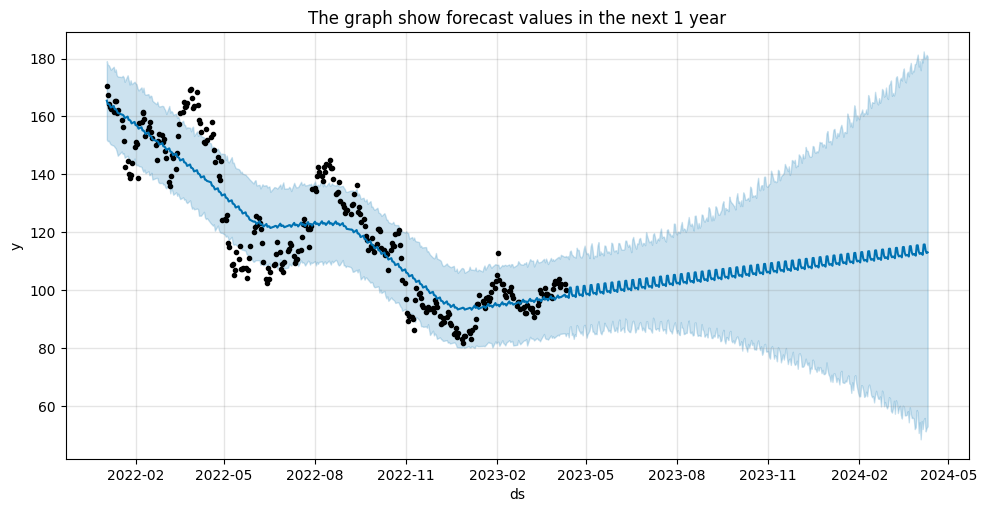

In [74]:
# Display forecast in the next 1 year
fig1 = model.plot(forecast, figsize = (10,5))
plt.title('The graph show forecast values in the next 1 year')
plt.show()

Insight:  
As a result, close price witnessed a slight increase to nearly 20 dollars in the next year and a significant variance in the next time.

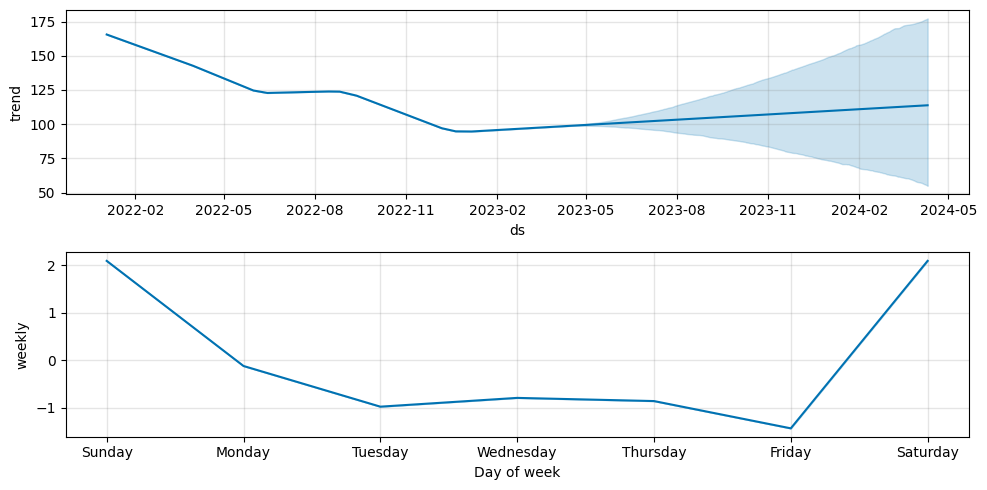

In [75]:
# Forecast components to see yearly, seasonality, and weekly seasonality of the time series.
fig2 = model.plot_components(forecast, figsize=(10,5))
plt.show()

Insight:  
It is clearly that while the number of close prices was the highest on Sunday and recovered its intital on Staturday, there was a drammatical drop from Monday to Tuesday before a steep fluctuation in the next 4 day of week ( from Tuesday to Friday).

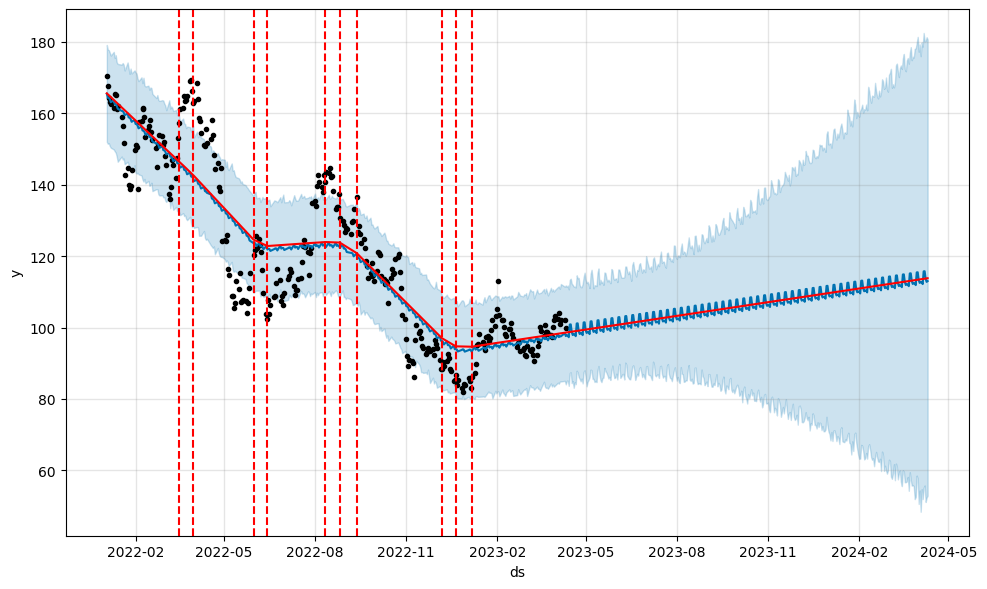

In [77]:
from prophet.plot import add_changepoints_to_plot
fig3 = model.plot(forecast)
a = add_changepoints_to_plot(fig3.gca(),model, forecast)